In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import peakutils
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import find_peaks

In [121]:
#Este código/rutina realiza el baseline de un espectro 

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

#Cargas el archivo, calcula línea base, a la original le quita la base, define hasta un umbral para los picos en la signal
#regresa además la intensidad máx en el pico
def GetSpectramax(filename):
    spectra = pd.read_csv( filename, sep='\t', skiprows=13, names=['Wavelength', 'Intensity'])
    base = baseline_als(spectra['Intensity'], 1e4, 0.001, 10)
    signal= spectra['Intensity']-base
    peaks, _ = find_peaks(signal, height=0.5)
    return max(signal[peaks])

#glob para leer el contenido del nombre de un directorio
import glob




In [122]:
#Filelist 
srcDir="'OD0.5IT1000AV3_33"
filelist=glob.glob('OD0.5IT1000AV3_33/*.txt')
index=len(srcDir)
filelist[0][index:(index+3)]


#queremos una lista vacia
empty_list=[]
for item in filelist:
    if item[index:(index+3)] not in empty_list:
        empty_list.append(item[index:(index+3)])


In [123]:
#construye el filtro para nombres de los archivos a partir del prefixo de potencia
group=glob.glob(filelist[0][0:index]+empty_list[0]+'*.txt')

Maxima=[]

potencia=[]

for prefix in empty_list:
    group=glob.glob(filelist[0][0:index]+prefix+'*.txt')
    
    Max_group=[]
    for item in group:
        Max_group.append(GetSpectramax(item))
        
    potencia.append(int (prefix))
    
    
    Maxima.append(max(Max_group))
    



(120.0, 230.0)

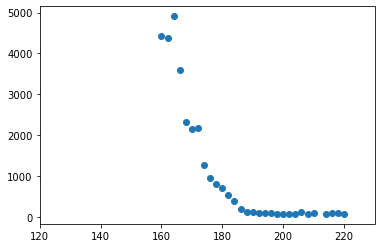

In [124]:
plt.plot(potencia, Maxima, "o")
plt.xlim(120,230)